In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

### Goal
- Develop a real estate pricing model that predicts house prices based on various features.
- Create an API that outputs the predicted price when given the features.

### Data Validation
- Was given three datasets: 'economics.csv', 'property_data.csv', and 'transactions.csv'. After merging the datasets, I had the following columns:
- **Property ID**: Numeric, unique identifier of the property sold.
- **Transaction Date**: Datetime, transaction date
- **Property Type**: Character, type of property. Categorize the property into: 'condo', 'apartment', 'house', and 'townhouse'.
- **Sale Price**: Numeric, price that the property was sold.
- **Purchase Price**: Numeric, price that the property was bought.
- **Comission Rate**: Numeric, comission that the agent charged for the transaction
- **Profit**: Numeric, difference between sale price and purchase price
- **Location**: Character, location name (Street)
- **Size sqft**: Numeric, square feet size of the property
- **Bedrooms**: Numeric, number of bedrooms.
- **Property Size**: Numeric, size of the property
- **Year Built**: Numeric, year in that the build was constructed.
- **Listing Price**: Numeric, price that the property was anouced.
- **Neighborhood**: Character, property neighborhood.
- **Garage Spaces**: Numeric, number of garage spaces
- **Has Pool**: Boolean, if the property has pool or not.


#### Data Problem
Since we want to predict the house prices, we are dealing with a **regression problem**. I will predict the **Sale Price** column.


#### Data Changes
- Droped some columns without enough variance.
- Change data type for date columns.
- Droped columns that could lead to leakeage, like the profit.

In [62]:
economics = pd.read_csv('Data/economics.csv')
transactions = pd.read_csv('Data/transactions.csv')
property = pd.read_csv('Data/property_data.csv')

#### Economics
- This dataset contains economics indicators, containing 1000 rows and 29 columns.
- It only contains numerical values.
- There aren't missing values.
- The dataset don't present outliers.
-
- **I couldn't find any column that relate this dataset to the others and there is no time stamp column.**
- **I recommend to explore the source of this data to include the time stamp, so we can link this dataset to the others.**

In [63]:
#Check for data type and missing values
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   interest_rate                    1000 non-null   float64
 1   unemployment_rate                1000 non-null   float64
 2   inflation_rate                   1000 non-null   float64
 3   gdp_growth_rate                  1000 non-null   float64
 4   labor_force_participation_rate   1000 non-null   float64
 5   consumer_confidence_index        1000 non-null   float64
 6   government_debt_to_gdp_ratio     1000 non-null   float64
 7   exchange_rate                    1000 non-null   float64
 8   stock_market_index               1000 non-null   float64
 9   housing_price_index              1000 non-null   float64
 10  manufacturing_pmi                1000 non-null   float64
 11  services_pmi                     1000 non-null   float64
 12  retail_sales_growth_r

In [64]:
#Check for outliers in economics
economics.describe()

,interest_rate,unemployment_rate,inflation_rate,gdp_growth_rate,labor_force_participation_rate,consumer_confidence_index,government_debt_to_gdp_ratio,exchange_rate,stock_market_index,housing_price_index,...,business_startups_rate,consumer_spending,investment_rate,savings_rate,tax_revenue,interest_coverage_ratio,bankruptcies_rate,business_closures_rate,consumer_debt_to_income_ratio,government_deficit_to_gdp_ratio
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.09107,10.194420,0.028130,-0.112480,51.37444,99.34441,101.817990,1.522520,25149.785260,272.993190,...,49.462030,496943.352770,49.210700,49.428900,5.014713e+07,50.89443,5.072960,5.066430,245.593610,5.096980
std,2.80546,5.687702,2.861397,5.713069,29.48179,56.14199,58.087382,0.855760,14634.920801,133.009378,...,29.178894,289123.488684,28.538652,29.015521,2.917962e+07,29.38848,2.933028,2.856688,146.879964,2.915088
min,0.00000,0.020000,-4.990000,-9.980000,0.06000,0.05000,0.150000,0.005900,13.370000,50.130000,...,0.070000,565.310000,0.010000,0.120000,1.413380e+05,0.14000,0.010000,0.050000,0.410000,0.010000
25%,2.84750,5.355000,-2.482500,-5.020000,25.18500,51.43750,51.510000,0.847225,12428.930000,157.015000,...,23.647500,245601.067500,23.275000,23.522500,2.539032e+07,25.17250,2.647500,2.692500,112.082500,2.640000
50%,5.17000,10.485000,0.185000,-0.295000,52.80500,99.56000,100.990000,1.504700,25787.745000,271.950000,...,50.370000,501958.465000,50.100000,49.845000,4.944122e+07,50.69500,5.155000,5.105000,253.260000,5.195000
75%,7.44250,15.155000,2.442500,4.700000,76.68000,145.05750,152.450000,2.263350,37547.280000,387.502500,...,74.667500,733707.425000,74.010000,75.075000,7.625037e+07,76.92000,7.512500,7.520000,371.207500,7.625000
max,10.00000,19.970000,4.990000,9.950000,99.90000,199.96000,199.600000,2.998800,49977.020000,499.280000,...,99.830000,999429.530000,99.970000,99.980000,9.996664e+07,99.96000,10.000000,9.990000,497.060000,10.000000


### Transactions
- This dataset contains transactions history, containing 1000 rows and 10 columns
- 'transaction_date' column was in wrong format and was converted.
- 'buyer_name', 'seller_name', and 'agent_name' don't have enough variance in their categories, an unique person doesn't repeat between rows.
- The dataset doesn't present outliers

#### Data description

- **Property ID**: Numeric, unique identifier of the property sold.
- **Transaction Date**: Datetime, transaction date
- **Property Type**: Character, type of property. Categorize the property into: 'condo', 'apartment', 'house', and 'townhouse'.
- **Sale Price**: Numeric, price that the property was sold.
- **Purchase Price**: Numeric, price that the property was bought.
- **Comission Rate**: Numeric, comission that the agent charged for the transaction

In [65]:
#Check for data type and missing values
print(transactions.info())
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_id       1000 non-null   int64  
 1   transaction_date  1000 non-null   object 
 2   property_type     1000 non-null   object 
 3   sale_price        1000 non-null   float64
 4   purchase_price    1000 non-null   float64
 5   buyer_name        1000 non-null   object 
 6   seller_name       1000 non-null   object 
 7   agent_name        1000 non-null   object 
 8   commission_rate   1000 non-null   float64
 9   profit            1000 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 78.3+ KB
None


In [66]:
#Check for property type variance and unique values
print(transactions.groupby('property_type').size().sort_values(ascending=False))
transactions['property_type'].unique()

property_type
condo        259
house        259
apartment    245
townhouse    237
dtype: int64


array(['condo', 'apartment', 'house', 'townhouse'], dtype=object)

In [67]:
#Check for buyer_name variance and unique values
transactions.groupby('buyer_name').size().sort_values(ascending=False).head(5)

buyer_name
Zolly Eagle      1
Abbey Poon       1
Abdel Bucklee    1
Abel Buterton    1
Abel Speight     1
dtype: int64

In [68]:
#Check for seller_name variance and unique values
transactions.groupby('seller_name').size().sort_values(ascending=False).head(5)

seller_name
Zonnya McGahey      1
Abbie Giacobelli    1
Abbott Kleinfeld    1
Abigail Welham      1
Ade Coote           1
dtype: int64

In [69]:
#Check for agent_name variance and unique values
transactions.groupby('agent_name').size().sort_values(ascending=False).head(5)

agent_name
Zorine Hasney       1
Abagail Willwood    1
Abbe Laurenty       1
Abbie Lorain        1
Abner Glasard       1
dtype: int64

In [70]:
#Dropping columns without variance or leakeage
transactions = transactions.drop(['buyer_name', 'seller_name', 'agent_name', 'profit', 'commission_rate'], axis=1)

In [71]:
#Check for outliers
transactions.describe()

,property_id,transaction_date,sale_price,purchase_price
count,1000.000000,1000,1000.000000,1000.000000
mean,500.500000,2020-12-22 03:51:50.400000,527628.918960,528515.232120
min,1.000000,2020-01-01 00:00:00,51745.340000,51704.270000
25%,250.750000,2020-06-24 00:00:00,289499.695000,290190.015000
50%,500.500000,2020-12-21 00:00:00,520343.345000,534299.390000
75%,750.250000,2021-06-18 00:00:00,756956.712500,774404.957500
max,1000.000000,2021-12-29 00:00:00,999774.430000,998700.150000
std,288.819436,NaN,273770.592932,278594.847411


### Property
- This dataset contains property proprieties, containing 1000 rows and 15 columns
- 'property_id' and 'id' have the same values. I droped 'id'.
- 'location' has low variance. We have 1000 rows and 437 location types. The most frequent location has 8 observations. It's recommended to group these location by a more macro region.
- 'year_built' was in the wrong format, I conveted it to datetime.
- 'bedrooms' and 'num_bedrooms' have the same meaning. I droped 'num_bedrooms'
- 'num_bathrooms' was in the wrong format. I decided to drop this column, since we have the same information in 'bathroom' column.
- Since I found inconsistency into 'property' dataset and we have 'property_type' in both, property dataset and transaction dataset, I droped property_type in property dataset.

#### Data description

- **Location**: Character, location name (Street)
- **Size sqft**: Numeric, square feet size of the property
- **Bedrooms**: Numeric, number of bedrooms.
- **Property ID**: Numeric, unique identifier of the property.
- **Property Size**: Numeric, size of the property
- **Year Built**: Numeric, year in that the build was constructed.
- **Listing Price**: Numeric, price that the property was anouced.
- **Neighborhood**: Character, property neighborhood.
- **Garage Spaces**: Numeric, number of garage spaces
- **Has Pool**: Boolean, if the property has pool or not.

In [72]:
print(property.info())
property['year_built'] = pd.to_datetime(property['year_built'], format='%Y')
property = property.drop(['num_bathrooms', 'num_bedrooms', 'property_type'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   location       1000 non-null   object 
 2   size_sqft      1000 non-null   int64  
 3   bedrooms       1000 non-null   int64  
 4   bathrooms      1000 non-null   int64  
 5   property_id    1000 non-null   int64  
 6   property_type  1000 non-null   object 
 7   property_size  1000 non-null   int64  
 8   year_built     1000 non-null   int64  
 9   listing_price  1000 non-null   float64
 10  num_bedrooms   1000 non-null   int64  
 11  num_bathrooms  1000 non-null   float64
 12  neighborhood   1000 non-null   object 
 13  garage_spaces  1000 non-null   int64  
 14  has_pool       1000 non-null   bool   
dtypes: bool(1), float64(2), int64(9), object(3)
memory usage: 110.5+ KB
None


In [73]:
#Check for property id and property_id. Both have the same values, we can drop one of those columns
(property['id'] - property['property_id']).value_counts()
property = property.drop('id', axis=1)

In [74]:
#Check for location variance and unique values
property.groupby('location').size().sort_values(ascending=False)
property = property.drop('location', axis=1)

In [75]:
#Check for neighborhood variance and unique values
property.groupby('neighborhood').size().sort_values(ascending=False)

neighborhood
rural       352
suburban    327
urban       321
dtype: int64

In [76]:
#Check garage_spaces
property['garage_spaces'].value_counts()

garage_spaces
0    264
2    254
1    253
3    229
Name: count, dtype: int64

In [77]:
property['bedrooms'].value_counts()

bedrooms
4    221
1    211
3    199
2    192
5    177
Name: count, dtype: int64

In [78]:
property['bathrooms'].value_counts()

bathrooms
4    179
1    170
3    168
5    168
6    162
2    153
Name: count, dtype: int64

In [79]:
#Check for numerical values
property.describe()

,size_sqft,bedrooms,bathrooms,property_id,property_size,year_built,listing_price,garage_spaces
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000
mean,501.028000,2.961000,3.508000,500.500000,2760.230000,1962-10-22 15:21:36,544311.871870,1.448000
min,1.000000,1.000000,1.000000,1.000000,505.000000,1900-01-01 00:00:00,100358.270000,0.000000
25%,260.750000,2.000000,2.000000,250.750000,1579.500000,1933-10-01 18:00:00,320294.705000,0.000000
50%,480.500000,3.000000,4.000000,500.500000,2792.500000,1963-01-01 00:00:00,537369.045000,1.000000
75%,750.000000,4.000000,5.000000,750.250000,3944.000000,1994-04-02 06:00:00,764595.350000,2.000000
max,1000.000000,5.000000,6.000000,1000.000000,4993.000000,2022-01-01 00:00:00,999759.420000,3.000000
std,287.186088,1.401943,1.699065,288.819436,1319.579978,NaN,258375.306032,1.111094


In [80]:
df = transactions.merge(property, how='outer', on='property_id')
df.set_index('property_id', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_date  1000 non-null   datetime64[ns]
 1   property_type     1000 non-null   object        
 2   sale_price        1000 non-null   float64       
 3   purchase_price    1000 non-null   float64       
 4   size_sqft         1000 non-null   int64         
 5   bedrooms          1000 non-null   int64         
 6   bathrooms         1000 non-null   int64         
 7   property_size     1000 non-null   int64         
 8   year_built        1000 non-null   datetime64[ns]
 9   listing_price     1000 non-null   float64       
 10  neighborhood      1000 non-null   object        
 11  garage_spaces     1000 non-null   int64         
 12  has_pool          1000 non-null   bool          
dtypes: bool(1), datetime64[ns](2), float64(3), int64(5), object(2)
memory usage: 102.5+

#### Exploratory Analysis

I have explored the target variable and features, and the relationship between target variable and features. After the analysis, I decided to apply the following transformations:

##### Insights for Modeling step
- After exploring the target variable, I noticed that we have more High category for Traffic Distribution. To ensure that the model predicts well both categories, I will stratify by the target variable when spliting the data.
- The numerical features, calories, carbohydrates, sugar, and protein, are right skewed. I will made a log transformation


In [81]:
df['build_age'] = df['transaction_date'] - df['year_built']
df.drop('year_built', axis=1, inplace=True)

<Figure size 800x500 with 0 Axes>

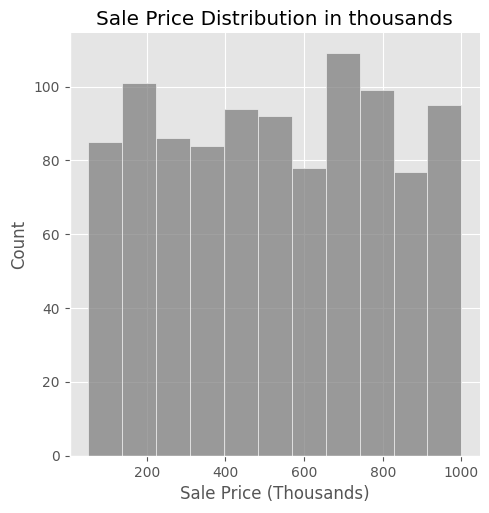

In [82]:
plt.figure(figsize=(8, 5))
sns.displot(df['sale_price']/1000, kind='hist', color='gray').set(title='Sale Price Distribution in thousands')
plt.xlabel('Sale Price (Thousands)')
plt.show()

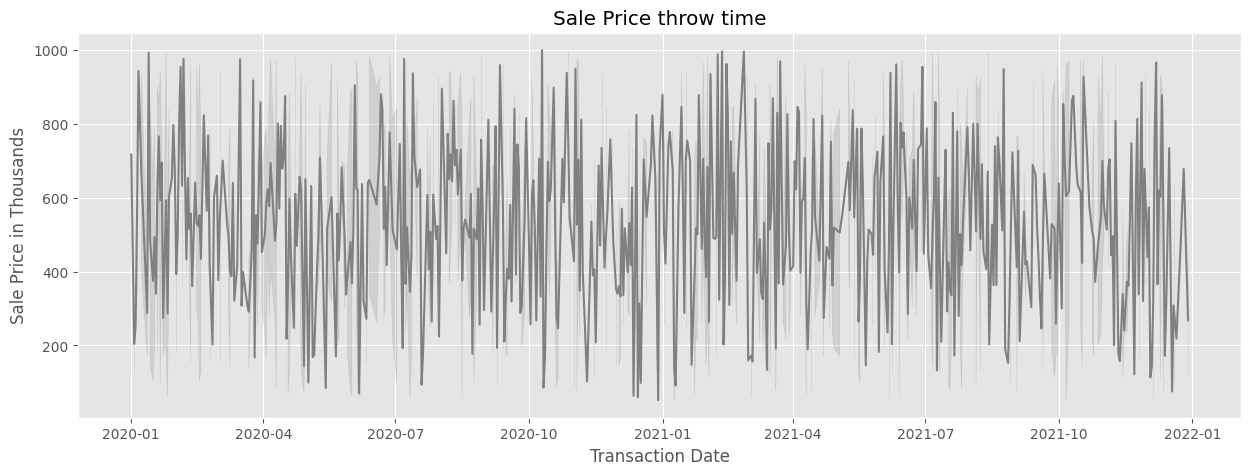

In [83]:
plt.figure(figsize=(15, 5))
sns.lineplot(x=df['transaction_date'], y=df['sale_price']/1000, color='gray').set(title='Sale Price throw time')
plt.xlabel('Transaction Date')
plt.ylabel('Sale Price in Thousands')
plt.show()

#### Exploring the categorical features
##### Property Type analysis 
- The mean price for each property type are very close. A slight difference for 'condo', which has lower price than the other property types.

##### Neighborhood  
- The mean price for each neighborhood is also very close. Rural neighborhood has lower price thant the other property types.

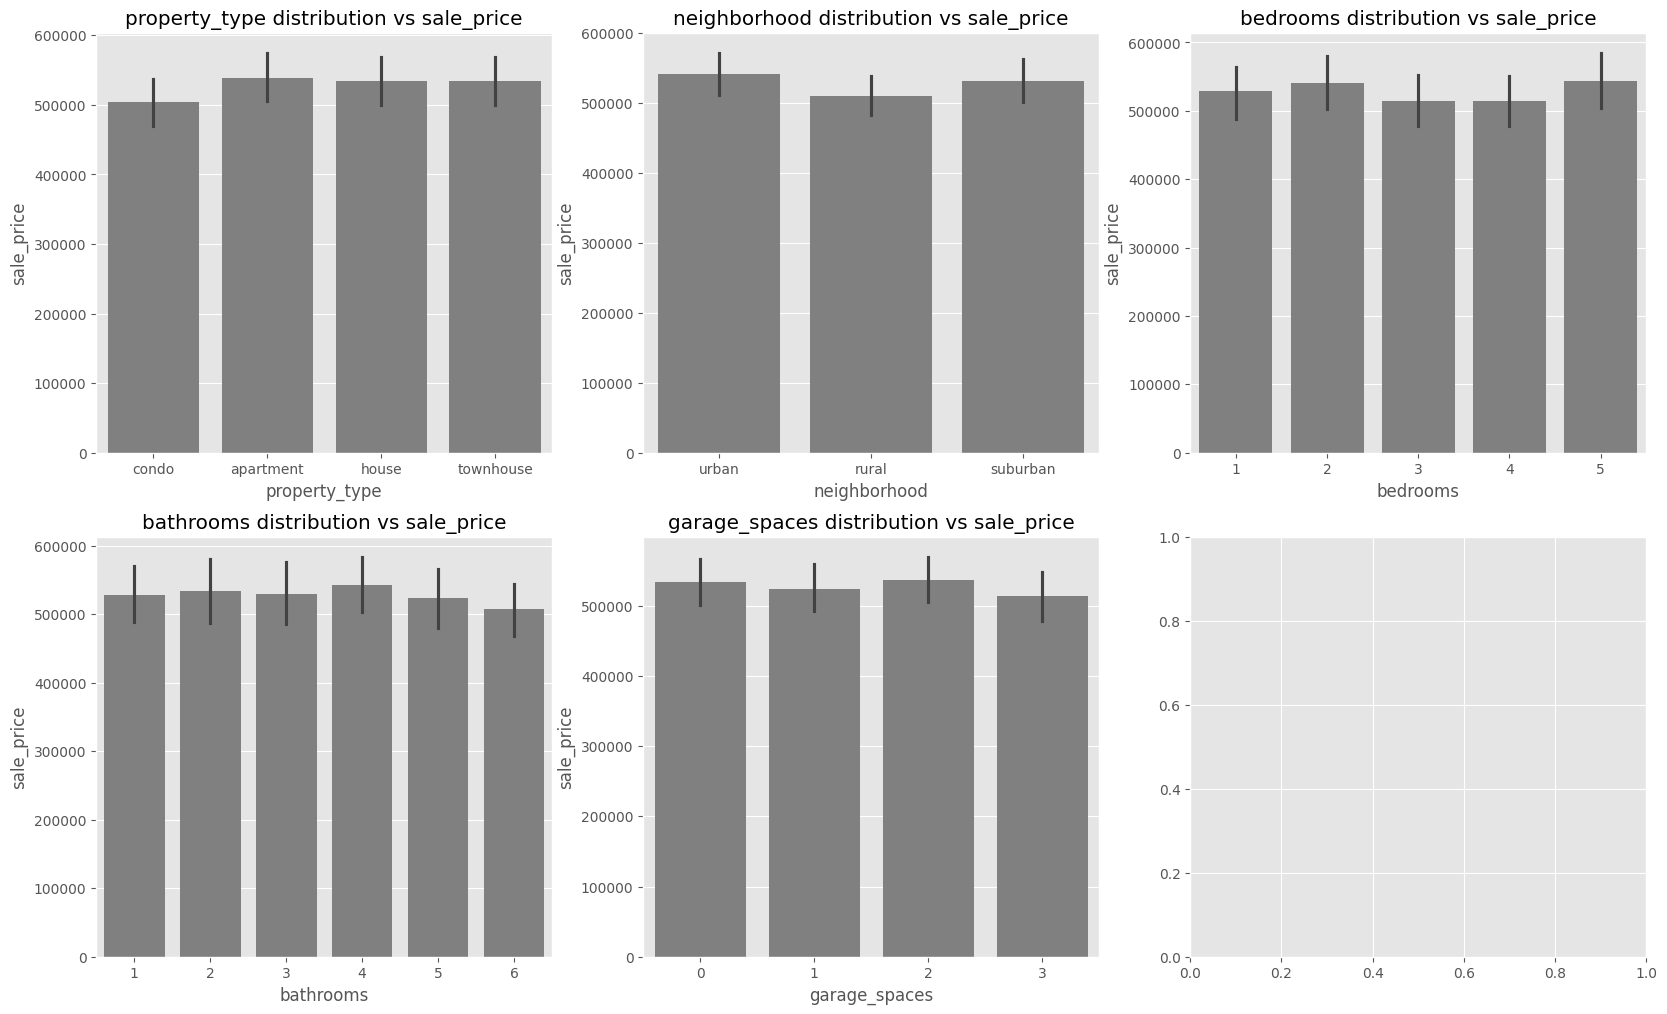

In [84]:
cat_columns = df.select_dtypes('object').columns.to_list() + ['bedrooms', 'bathrooms', 'garage_spaces']
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
for i in range(len(cat_columns)):
    sns.barplot(x=cat_columns[i], y='sale_price', data=df, color='gray', ax=axes[i//3, i%3]).set(title=f'{cat_columns[i]} distribution vs sale_price')
plt.show()

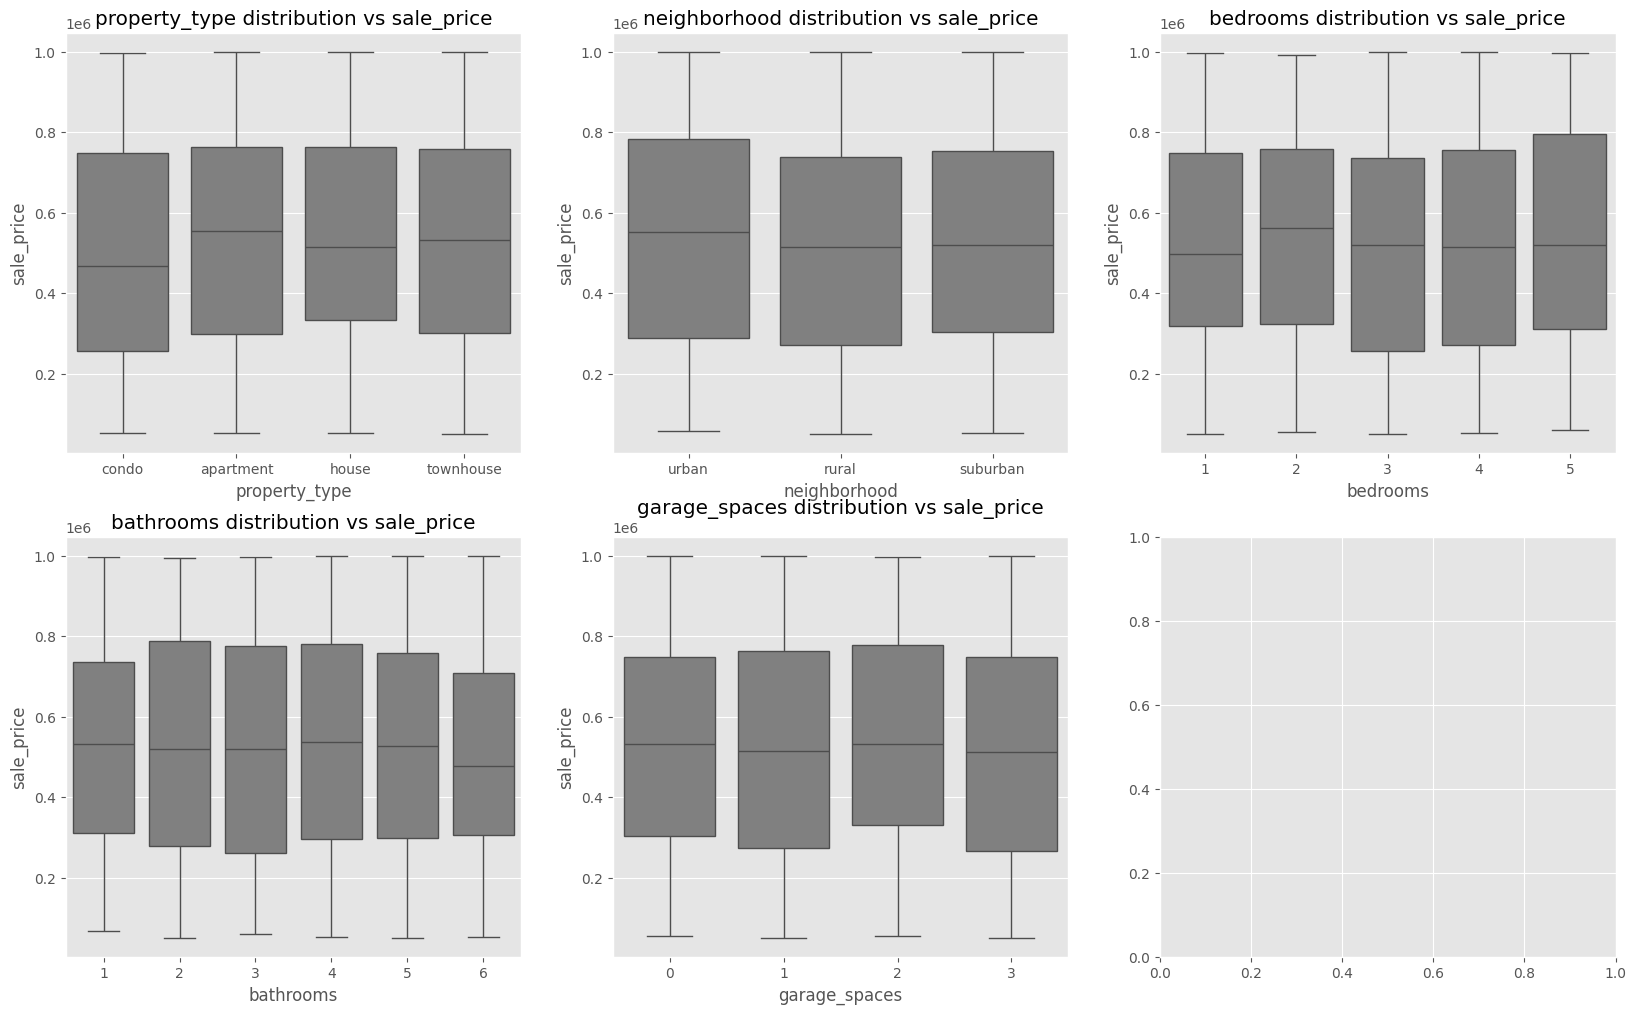

In [85]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
for i in range(len(cat_columns)):
    sns.boxplot(x=cat_columns[i], y='sale_price', data=df, color='gray', ax=axes[i//3, i%3]).set(title=f'{cat_columns[i]} distribution vs sale_price')
plt.show()

#### Exploring the numerical features
##### Nutrients analysis 
- All nutrients: Calories, Carbohydrate, Sugar and Protein are right skewed. To improve model performance it is recommended to apply logarithm transformation on these features. I also take care to use median instead of mean to analyse the relationship between these variables and the target variable.
- Analysing their relationship with the target variable, high traffic, I notice that recipes with high level of protein, carbohydrate and calories are more likely to attract a high traffic. Recipes with high level of sugar are unlikely to get a high traffic
- When exploring the relationship between the micro nutrients, carbohydrate, sugar and protein, the calories, and traffic. I noticed that recipes with low protein and high calories are unlikely to get a high traffic.

In [86]:
df

,transaction_date,property_type,sale_price,purchase_price,size_sqft,bedrooms,bathrooms,property_size,listing_price,neighborhood,garage_spaces,has_pool,build_age
property_id,,,,,,,,,,,,,
1,2021-10-01,condo,653373.06,662630.16,768,3,2,4157,866818.73,urban,1,False,3561 days
2,2020-10-08,apartment,728074.72,963319.61,794,1,6,2393,393604.20,rural,0,True,8681 days
3,2021-11-29,condo,365788.88,261962.98,385,3,5,3735,499365.09,urban,2,True,5446 days
4,2021-11-04,condo,954816.35,509242.99,147,5,5,4427,495378.90,suburban,0,True,29527 days
5,2020-06-23,house,288099.35,240156.97,156,3,5,3328,454512.91,urban,0,False,28663 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2021-01-02,house,760215.44,436031.99,757,4,5,2529,730786.23,rural,3,True,30317 days
997,2020-03-22,condo,378646.36,631635.12,86,5,5,4030,969015.48,suburban,0,False,28570 days
998,2020-11-28,apartment,486367.30,767525.65,200,1,5,3995,386034.74,urban,2,False,2523 days


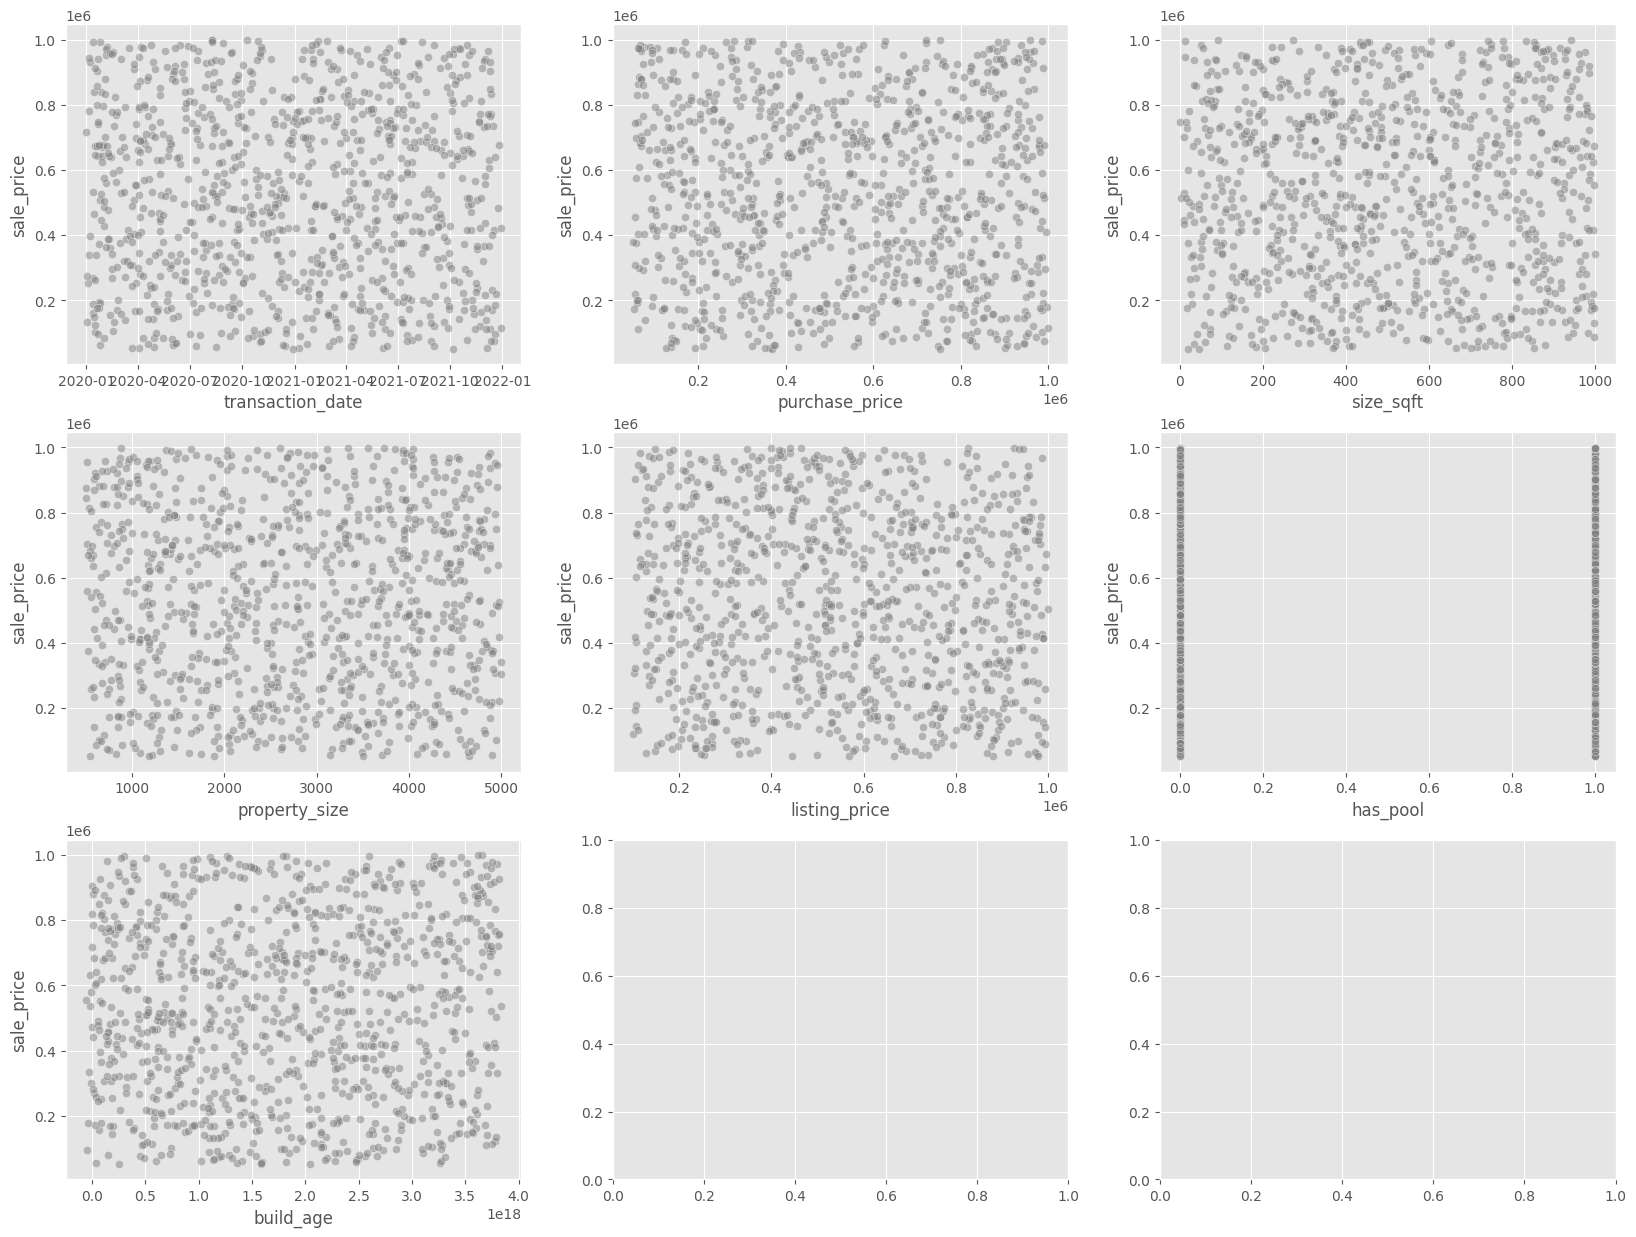

In [87]:
num_columns = df.drop(cat_columns, axis=1).drop('sale_price', axis=1).columns
fig, axes = plt.subplots(len(num_columns)//3+1, 3, figsize=(20, 15))
for i in range(len(num_columns)):
    sns.scatterplot(x=num_columns[i], y='sale_price', data=df, color='gray', ax=axes[i//3, i%3], alpha=.5)
plt.show()

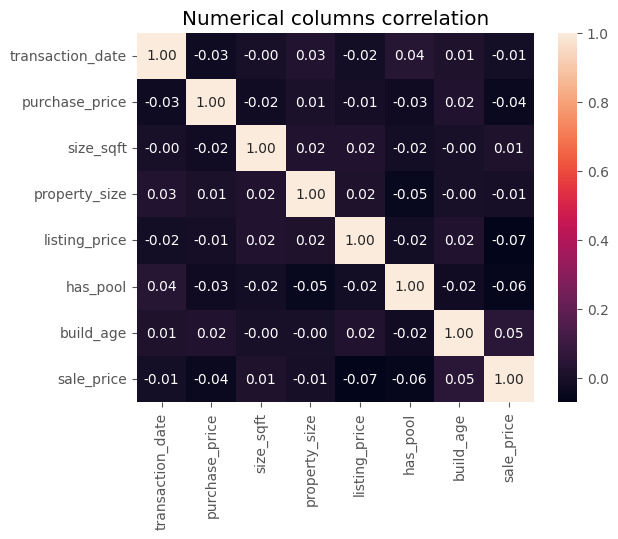

In [88]:
sns.heatmap(df[num_columns.to_list() + ['sale_price']].corr(), annot=True, fmt=".2f").set(title='Numerical columns correlation')
plt.show()